In [1]:
import pandas as pd

df = pd.read_csv("Construction_Dataset.csv")

**EXPLORATORY DATA ANALYSIS**

In [2]:
df.head()

,Labor Requirements,Equipment Usage,Material Quantities,Project Duration (days),Resource Allocation Efficiency,Schedule Optimization,Computation Time (CT),Best Cost (BC),Evaluation Metric (Nfe),Mean Resource Demand,SD of Resource Demand,Risk Level
0,152,21,752.666578,291,79.740040,0,119.105430,9.001976e+05,180,78.028242,10.530459,0
1,142,17,1463.863953,348,71.332190,1,153.138143,1.056578e+06,182,90.144405,15.429264,2
2,64,20,1639.016492,341,91.470780,0,101.541888,3.083878e+05,290,98.225578,12.600627,0
3,156,12,1250.667964,278,75.897926,1,233.622856,5.412628e+05,295,90.883581,15.876901,2
4,121,23,1313.545497,318,80.544442,0,125.276613,1.142576e+06,207,93.694853,12.613284,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Labor Requirements              1000 non-null   int64  
 1   Equipment Usage                 1000 non-null   int64  
 2   Material Quantities             1000 non-null   float64
 3   Project Duration (days)         1000 non-null   int64  
 4   Resource Allocation Efficiency  1000 non-null   float64
 5   Schedule Optimization           1000 non-null   int64  
 6   Computation Time (CT)           1000 non-null   float64
 7   Best Cost (BC)                  1000 non-null   float64
 8   Evaluation Metric (Nfe)         1000 non-null   int64  
 9   Mean Resource Demand            1000 non-null   float64
 10  SD of Resource Demand           1000 non-null   float64
 11  Risk Level                      1000 non-null   int64  
dtypes: float64(6), int64(6)
memory usag

In [4]:
df.describe()

,Labor Requirements,Equipment Usage,Material Quantities,Project Duration (days),Resource Allocation Efficiency,Schedule Optimization,Computation Time (CT),Best Cost (BC),Evaluation Metric (Nfe),Mean Resource Demand,SD of Resource Demand,Risk Level
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,125.846000,16.93300,1238.973329,295.273000,80.144450,0.477000,249.174062,6.460788e+05,223.565000,80.626932,15.004089,1.034000
std,43.786911,7.22362,430.883322,116.402199,11.402828,0.499721,85.723183,3.212678e+05,42.451053,11.686349,2.861113,0.815788
min,50.000000,5.00000,500.282599,100.000000,60.053851,0.000000,100.493127,1.006903e+05,150.000000,60.063177,10.013555,0.000000
25%,88.000000,11.00000,850.743683,193.000000,70.363962,0.000000,176.387896,3.618518e+05,187.000000,70.809250,12.593704,0.000000
50%,126.500000,17.00000,1242.449926,289.500000,80.478467,0.000000,249.812092,6.501784e+05,222.000000,80.936681,15.108641,1.000000
75%,164.000000,23.00000,1618.814497,400.250000,90.150673,1.000000,323.514467,9.082359e+05,259.000000,90.910337,17.528110,2.000000
max,199.000000,29.00000,1999.570706,498.000000,99.904913,1.000000,399.714849,1.199834e+06,299.000000,99.989651,19.994964,2.000000


In [5]:
df.isnull().sum()

Labor Requirements                0
Equipment Usage                   0
Material Quantities               0
Project Duration (days)           0
Resource Allocation Efficiency    0
Schedule Optimization             0
Computation Time (CT)             0
Best Cost (BC)                    0
Evaluation Metric (Nfe)           0
Mean Resource Demand              0
SD of Resource Demand             0
Risk Level                        0
dtype: int64

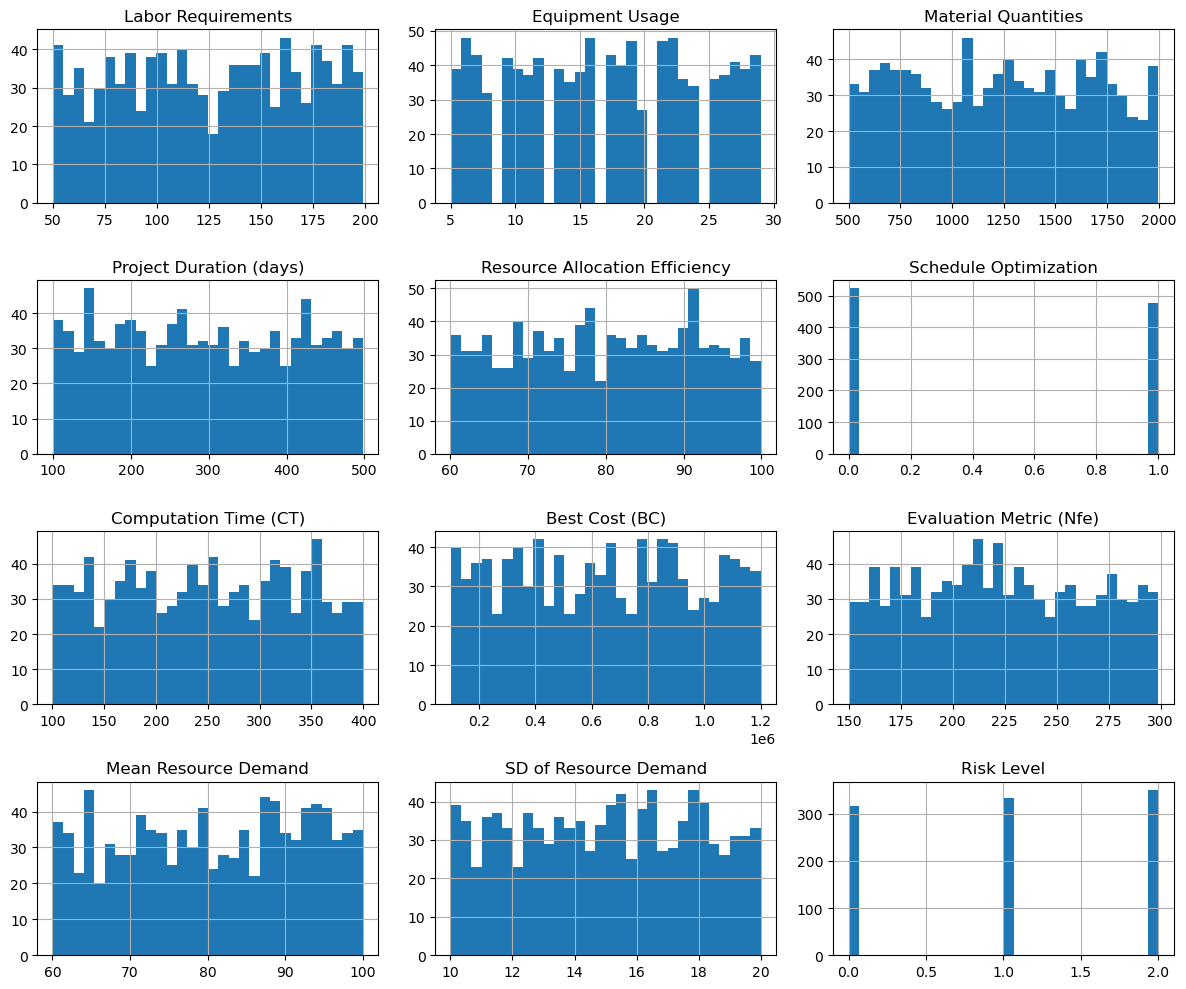

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

df.hist(figsize=(12,10), bins=30)
plt.tight_layout()
plt.show()

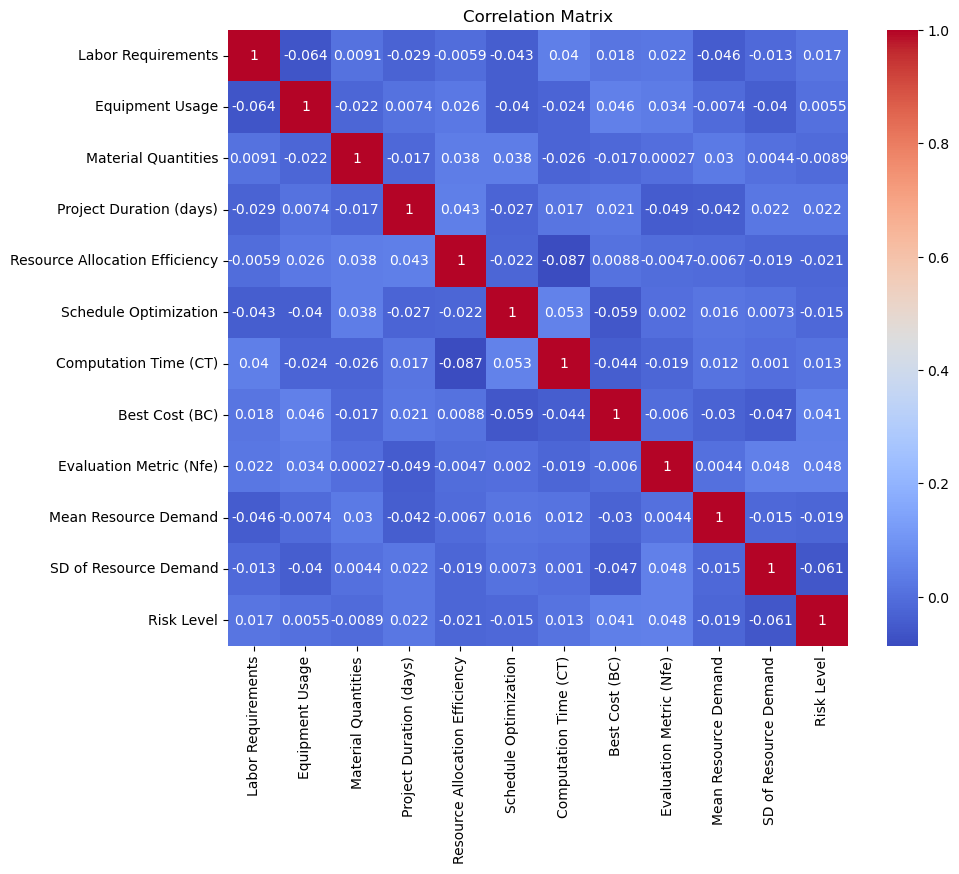

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


**FEATURE ENGINEERING**

In [16]:
from sklearn.preprocessing import StandardScaler

# Copy agar tidak merusak data asli
df_scaled = df.copy()

# Pisahkan target
target = df_scaled['Resource Allocation Efficiency']

# One-hot encoding untuk Risk Level
df_encoded = pd.get_dummies(df_scaled, columns=['Risk Level'], drop_first=False)

# Pisahkan fitur numerik saja untuk scaling
features_numeric = df_encoded.drop(columns=['Resource Allocation Efficiency', 'Risk Level_1', 'Risk Level_2'])

# Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_numeric)

# Ubah ke DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=features_numeric.columns)

# Tambahkan kembali kolom one-hot Risk Level
features_scaled_df[['Risk Level_1', 'Risk Level_2']] = df_encoded[['Risk Level_1', 'Risk Level_2']].reset_index(drop=True)

# Gabungkan kembali dengan target
df_scaled_final = pd.concat([features_scaled_df, target.reset_index(drop=True)], axis=1)

# Cek hasil
df_scaled_final.head()

,Labor Requirements,Equipment Usage,Material Quantities,Project Duration (days),Schedule Optimization,Computation Time (CT),Best Cost (BC),Evaluation Metric (Nfe),Mean Resource Demand,SD of Resource Demand,Risk Level_0,Risk Level_1,Risk Level_2,Resource Allocation Efficiency
0,0.597601,0.563296,-1.129192,-0.036727,-0.955011,-1.518069,0.791383,-1.026754,-0.222481,-1.564380,1.471243,False,False,79.740040
1,0.369108,0.009280,0.522190,0.453199,1.047108,-1.120863,1.278387,-0.979618,0.814817,0.148679,-0.679697,False,True,71.332190
2,-1.413138,0.424792,0.928890,0.393033,-0.955011,-1.723058,-1.051646,1.565762,1.506668,-0.840465,1.471243,False,False,91.470780
3,0.688998,-0.683240,0.027155,-0.148465,1.047108,-0.181503,-0.326421,1.683604,0.878100,0.305213,-0.679697,False,True,75.897926
4,-0.110728,0.840304,0.173155,0.195343,-0.955011,-1.446043,1.546203,-0.390409,1.118781,-0.836039,-0.679697,True,False,80.544442


In [9]:
correlation_target = df_scaled.corr()['Resource Allocation Efficiency'].sort_values(ascending=False)
print(correlation_target)

Resource Allocation Efficiency    1.000000
Project Duration (days)           0.042610
Material Quantities               0.037555
Equipment Usage                   0.025672
Best Cost (BC)                    0.008783
Evaluation Metric (Nfe)          -0.004725
Labor Requirements               -0.005866
Mean Resource Demand             -0.006678
SD of Resource Demand            -0.019093
Risk Level                       -0.021299
Schedule Optimization            -0.021800
Computation Time (CT)            -0.087012
Name: Resource Allocation Efficiency, dtype: float64


In [10]:
from sklearn.model_selection import train_test_split

# Gunakan fitur hasil scaling
X = df_scaled.drop(columns=['Resource Allocation Efficiency'])
y = df_scaled['Resource Allocation Efficiency']

# Split ke train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (800, 11)
Test size: (200, 11)


**BASELINE MODELLING and EVALUATION**

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Inisialisasi model
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Fit model
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Prediksi
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Evaluasi
def evaluate_model(y_true, y_pred, model_name):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.4f}, R2: {r2:.4f}")

evaluate_model(y_test, lr_pred, "Linear Regression")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, xgb_pred, "XGBoost")

Linear Regression - RMSE: 11.6390, R2: -0.0131
Random Forest - RMSE: 11.7730, R2: -0.0365
XGBoost - RMSE: 12.7034, R2: -0.2068


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**MODEL TUNING and IMPROVEMENT**

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
lr_model.fit(X_train_scaled, y_train)
lr_pred_scaled = lr_model.predict(X_test_scaled)
evaluate_model(y_test, lr_pred_scaled, "Linear Regression (Scaled)")

Linear Regression (Scaled) - RMSE: 11.6390, R2: -0.0131


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:
top_features = ['Project Duration (days)', 'Material Quantities', 'Equipment Usage', 'Best Cost (BC)','Risk Level']
X_top = df[top_features]
y = df['Resource Allocation Efficiency']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

evaluate_model(y_test, y_pred, "Linear Regression (Top Features + Scaled)")


Linear Regression (Top Features + Scaled) - RMSE: 11.6390, R2: -0.0131


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [20]:
# Ambil hanya top features dari data
top_features = ['Project Duration (days)', 'Material Quantities', 'Equipment Usage', 'Best Cost (BC)']
X_top = df[top_features]
y = df['Resource Allocation Efficiency']

# Split ulang dengan X_top
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Inisialisasi model
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Fit model
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Prediksi
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Evaluasi (gunakan fungsi evaluasi_model sebelumnya)
evaluate_model(y_test, lr_pred, "Linear Regression (Top Features)")
evaluate_model(y_test, rf_pred, "Random Forest (Top Features)")
evaluate_model(y_test, xgb_pred, "XGBoost (Top Features)")


Linear Regression (Top Features) - RMSE: 11.6087, R2: -0.0078
Random Forest (Top Features) - RMSE: 12.0634, R2: -0.0883
XGBoost (Top Features) - RMSE: 13.2586, R2: -0.3146


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**HYPERPARAMETER TUNING**

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Param grid (bisa diubah nanti jika ingin eksplor lebih dalam)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [22]:
# Model dasar
rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # jumlah kombinasi yang dicoba
    cv=5,       # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# Latih model
rf_random.fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
55 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [23]:
# Model terbaik
best_rf = rf_random.best_estimator_

# Prediksi
y_pred_best = best_rf.predict(X_test)

# Evaluasi
evaluate_model(y_test, y_pred_best, "Random Forest (Tuned)")


Random Forest (Tuned) - RMSE: 11.6578, R2: -0.0164


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**FEATURE IMPORTANCE and INTERPRETATION**

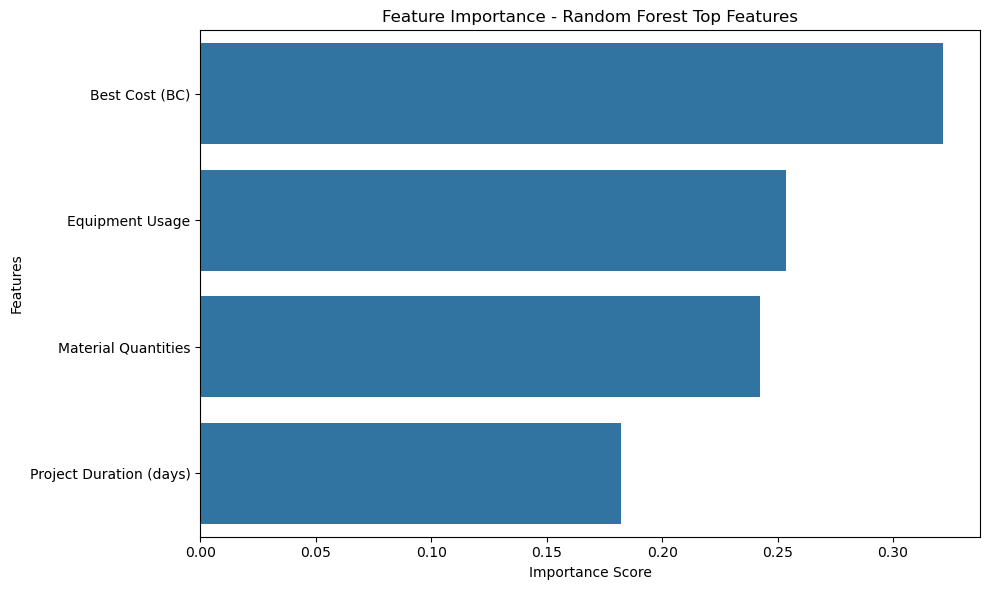

In [35]:
# Ambil feature importance dari model terbaik
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gunakan X_top.columns agar sesuai dengan fitur yang digunakan model
feature_importances = pd.Series(best_rf.feature_importances_, index=X_top.columns)

# Urutkan dari yang paling penting
feature_importances = feature_importances.sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance - Random Forest Top Features")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression

# Pilih fitur terbaik (berdasarkan importance atau korelasi)
top_features = ['Material Quantities', 'Best Cost (BC)', 'Project Duration (days)', 'Equipment Usage']

# Split data
X_top = df_scaled[top_features]
y_top = df_scaled['Resource Allocation Efficiency']
X_train, X_test, y_train, y_test = train_test_split(X_top, y_top, test_size=0.2, random_state=42)

# Inisialisasi dan fit model Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediksi
y_pred_lr = lr_model.predict(X_test)

In [26]:
# Evaluasi
evaluate_model(y_test, y_pred_lr, "Linear Regression (Top Features)")

Linear Regression (Top Features) - RMSE: 11.6087, R2: -0.0078


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


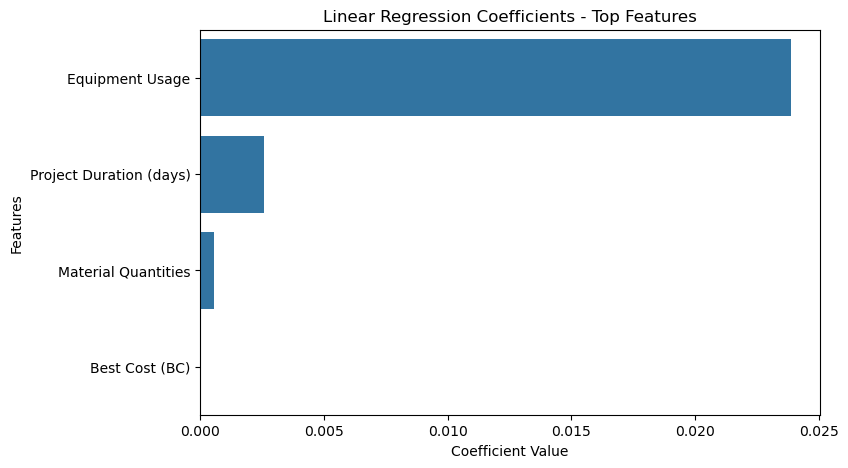

In [27]:
# Koefisien Linear Regression
coefficients = pd.Series(lr_model.coef_, index=top_features)
coefficients = coefficients.sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=coefficients.values, y=coefficients.index)
plt.title('Linear Regression Coefficients - Top Features')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

In [30]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Parameter grid untuk tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [33]:
# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # jumlah kombinasi yang dicoba
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit pada data training
rf_random.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
55 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
47 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [28]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Pilih top features
top_features = ['Material Quantities', 'Best Cost (BC)', 'Project Duration (days)', 'Equipment Usage']

X = df_scaled[top_features]
y = df_scaled['Resource Allocation Efficiency']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Prediksi
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost (Top Features) - RMSE: {rmse_xgb:.4f}, R2: {r2_xgb:.4f}")

XGBoost (Top Features) - RMSE: 13.2012, R2: -0.3033


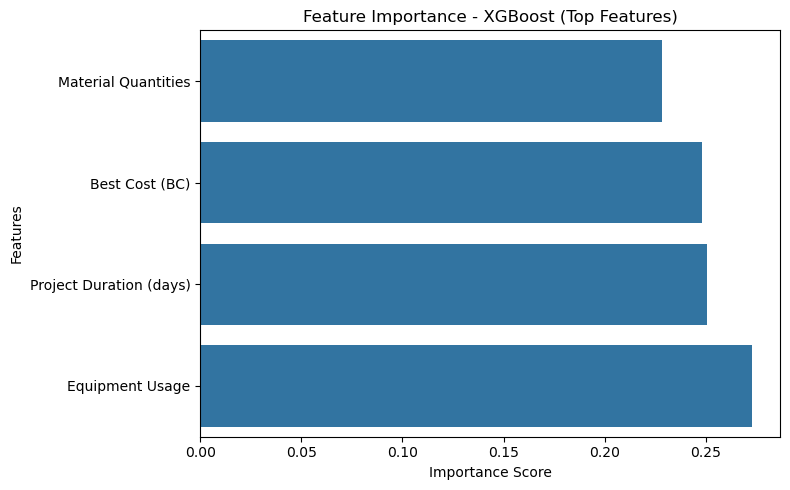

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi feature importance
plt.figure(figsize=(8, 5))
importance_scores = xgb_model.feature_importances_

sns.barplot(x=importance_scores, y=top_features)
plt.title("Feature Importance - XGBoost (Top Features)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()